In [853]:
import numpy as np
from itertools import product,permutations,combinations,compress
from iteration_utilities import deepflatten

In [854]:
chinese = "今晚","的","课程","有意思"
english = "tonight","of","the course","interesting"

## 计算组合可能性

In [855]:
def factorial(N):
    n = 1
    for i in range(1,N+1):
        n *= i
    return n

def Ank(n,k):
    return factorial(n)/factorial(n-k)

def Cnk(n,k):
    return factorial(n)/(factorial(k)*factorial(n-k))

In [856]:
Ank(4,4)

24.0

In [857]:
translation_range = list(permutations(english,4))
len(translation_range),translation_range

(24,
 [('tonight', 'of', 'the course', 'interesting'),
  ('tonight', 'of', 'interesting', 'the course'),
  ('tonight', 'the course', 'of', 'interesting'),
  ('tonight', 'the course', 'interesting', 'of'),
  ('tonight', 'interesting', 'of', 'the course'),
  ('tonight', 'interesting', 'the course', 'of'),
  ('of', 'tonight', 'the course', 'interesting'),
  ('of', 'tonight', 'interesting', 'the course'),
  ('of', 'the course', 'tonight', 'interesting'),
  ('of', 'the course', 'interesting', 'tonight'),
  ('of', 'interesting', 'tonight', 'the course'),
  ('of', 'interesting', 'the course', 'tonight'),
  ('the course', 'tonight', 'of', 'interesting'),
  ('the course', 'tonight', 'interesting', 'of'),
  ('the course', 'of', 'tonight', 'interesting'),
  ('the course', 'of', 'interesting', 'tonight'),
  ('the course', 'interesting', 'tonight', 'of'),
  ('the course', 'interesting', 'of', 'tonight'),
  ('interesting', 'tonight', 'of', 'the course'),
  ('interesting', 'tonight', 'the course', 'o

### 如果求英文选择最大的可能性就是求条件概率，已经知道中文的概率求英文对应的概率

# translation model => $ P(c|e) $  langnge model => $ P(e) $

# $$ max_e = P(e|c)$$
# $$ max_e = P(c|e)*P(e)$$
# 用贝叶斯定理定理的方式拆分成两部分，就是 translation model 和 langnge model
# $$ P(e|c) = \frac{P(c|e)*P(e)}{P(c)} $$ 
# 这就是Viterb Algothm 维特比算法

# 语言模型(language Model) <人话>
### 给定一句英文$e$,计算概率$(e)$
### 如果是符合英文语法的,$p(e)$会高
### 如果是随机语句,p(e)会低
# 翻译模型 <词典>
### 给定一对$<c,e>$,计算$p(c|e)$
### 语义相似度高,则$p(c|e)$高
### 语义相似度低,则$p(c|e)$低
# Decoding Algorithm <语言+翻译>
### 给定语言模型,翻译模型和f,找岀最优的使得$ρ(e)ρ(c|e)$最大


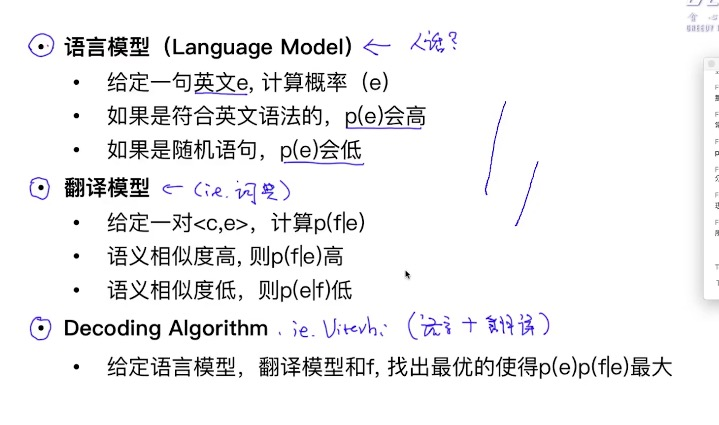

In [858]:
from IPython.display import display, Image
image_path = "/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/OCR部分/E16FB031-6B23-4F0E-BAE4-A6DC6A9C4736.png"
display( Image( filename = image_path ))

# Language Model(语言模型)
# 对于一个好的语言模型()
## $\mathrm{p} \text { (He is studying } \mathrm{Al})>\mathrm{p}$ (He studying $\mathrm{Al}$ is) 
## $\mathrm{p(nlp \text { is an interesting course })}>\mathrm{p(\text { interesting }  \text { course nlp is an })}$
# 怎么计算 p(.)
# 条件概率 
## $$ P(x,y) =P(x) \cdot P(y) $$
## $$ P(x,y) =P(x) \cdot P(y \mid x) $$
## $$ P(y,x) =P(y) \cdot P(x \mid y) $$

# 因为文本是顺序的，所以求的是前后的条件概率 
# Unit-gram Model
## $\mathrm{p}(\mathrm{He} \text { is studying } \mathrm{Al})=\mathrm{p}(\mathrm{He}) \mathrm{p}(\text { is }) \mathrm{p}(\text { studying }) \mathrm{p}(\mathrm{Al})$
## $\mathrm{P}(\mathrm{He} \text { is studying } \mathrm{Al})=\mathrm{p}(\mathrm{He}) \mathrm{p}(\text { is } \mid \mathrm{He}) \mathrm{p}(\text { studying } \mid \text { is }) \mathrm{p}(\mathrm{Al} \mid \text { studying })$
## $\mathrm{P}(\mathrm{He} \text { is studying } \mathrm{Al})=\mathrm{p}(\mathrm{He}) \mathrm{p}(\text { is } \mid \mathrm{He}) \mathrm{p}(\text { studying } \mid$ he is)
## $ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \mathrm{p}(\mathrm{Al} \mid \text { is studying })$

In [860]:
example = np.array([['他', '是', '一个', '人'],
       ['他', '是', '人', '一个'],
       ['他', '一个', '是', '人'],
       ['他', '一个', '人', '是'],
       ['他', '人', '是', '一个'],
       ['他', '人', '一个', '是'],
       ['是', '他', '一个', '人'],
       ['是', '他', '人', '一个'],
       ['是', '一个', '他', '人'],
       ['是', '一个', '人', '他'],
       ['是', '人', '他', '一个'],
       ['是', '人', '一个', '他'],
       ['一个', '他', '是', '人'],
       ['一个', '他', '人', '是'],
       ['一个', '是', '他', '人'],
       ['一个', '是', '人', '他'],
       ['一个', '人', '他', '是'],
       ['一个', '人', '是', '他'],
       ['人', '他', '是', '一个'],
       ['人', '他', '一个', '是'],
       ['人', '是', '他', '一个'],
       ['人', '是', '一个', '他'],
       ['人', '一个', '他', '是'],
       ['人', '一个', '是', '他'],
       ['他', '是', '一个', '人'],
       ['他', '是', '一个', '人'],
       ['它', '是', '一个', '模型'],
       ['它', '是', '模型', '一个'],
       ['它', '一个', '是', '模型'],
       ['它', '一个', '模型', '是'],
       ['它', '模型', '是', '一个'],
       ['它', '模型', '一个', '是'],
       ['是', '它', '一个', '模型'],
       ['是', '它', '模型', '一个'],
       ['是', '一个', '它', '模型'],
       ['是', '一个', '模型', '它'],
       ['是', '模型', '它', '一个'],
       ['是', '模型', '一个', '它'],
       ['一个', '它', '是', '模型'],
       ['一个', '它', '模型', '是'],
       ['一个', '是', '它', '模型'],
       ['一个', '是', '模型', '它'],
       ['一个', '模型', '它', '是'],
       ['一个', '模型', '是', '它'],
       ['模型', '它', '是', '一个'],
       ['模型', '它', '一个', '是'],
       ['模型', '是', '它', '一个'],
       ['模型', '是', '一个', '它'],
       ['模型', '一个', '它', '是'],
       ['模型', '一个', '是', '它'],
       ['它', '是', '一个', '模型'],
       ['它', '是', '一个', '模型']], dtype='<U2')

In [861]:
def slide(data,N,start,end,m,n):
    return np.array([data[i,j] for i,j in zip(start,end-N) if j > N and j < n ])

In [862]:
def prob_slide(word,original,dim=1,direction='left'):

    m,n = original.shape

    delete_rules = (original==word).any(axis=1)

    filter_mat = original[delete_rules > 0]
    filter_cond = np.argwhere(filter_mat == word)
    start = filter_cond[:,0]
    end = filter_cond[:,-1]

    counter_dict = dict({})
    for i in range(1,dim+1):
        if direction == "right":
            idim = i*-1
        else:
            idim = i
        print(idim)
        data = slide(filter_mat,idim,start,end,m,n)
        distion_data = np.unique(data)
        counter = {d:(data == d).dot(np.ones(data.shape[0]))/m for d in distion_data}
        if len(counter)>0:
            counter_dict.update({idim:counter})

    return counter_dict

prob_slide('is',example,dim=2,direction='right')

-1
-2


{}

In [863]:
def prob_dict(corpus):
    m,n = corpus.shape
    distion = np.unique(corpus)
    return np.array([[word,(corpus == word).dot(np.ones(n)).dot(np.ones(m))/(m*n)] for word in distion])
prob_dict(example)

array([['一个', '0.25'],
       ['人', '0.125'],
       ['他', '0.125'],
       ['它', '0.125'],
       ['是', '0.25'],
       ['模型', '0.125']], dtype='<U5')

In [864]:
def search_prob(original,dict_arr):
    key = dict_arr[:,0]
    value = dict_arr[:,-1]
    prob_list , dict_ = [],dict({})

    for word in original:
        index_ = np.argwhere(key==word)
        if index_.size>0:
            prob_list.append(float(value[index_[0][0]]))
            if display:
                dict_.update({word:value[index_[0][0]]})
        else:
            prob_list.append(0)
            if display:
                dict_.update({word:0})
    prob_arr = np.array(prob_list)
    return prob_arr
search_prob("它 是 模型".split(),prob_dict(example))#,display=True)

array([0.125, 0.25 , 0.125])

sentence: 分词后的句子
n: 取3，则为3-gram
m: 取1，则保留1-gram

# 因为文本是顺序的，所以求的是前后的条件概率 
# Unit-gram Model
## $\mathrm{p}(\mathrm{He} \text { is studying } \mathrm{Al})=\mathrm{p}(\mathrm{He}) \mathrm{p}(\text { is }) \mathrm{p}(\text { studying }) \mathrm{p}(\mathrm{Al})$
## $\mathrm{P}(\mathrm{He} \text { is studying } \mathrm{Al})=\mathrm{p}(\mathrm{He}) \mathrm{p}(\text { is } \mid \mathrm{He}) \mathrm{p}(\text { studying } \mid \text { is }) \mathrm{p}(\mathrm{Al} \mid \text { studying })$
## $\mathrm{P}(\mathrm{He} \text { is studying } \mathrm{Al})=\mathrm{p}(\mathrm{He}) \mathrm{p}(\text { is } \mid \mathrm{He}) \mathrm{p}(\text { studying } \mid$ he is)
## $ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \mathrm{p}(\mathrm{Al} \mid \text { is studying })$

In [865]:
def slide_word(textList,n):
    m = len(textList)
    return np.array([textList[i:i+n] for i in range(m) if len(textList[i:i+n]) ==n])
slide_word(original1.split(),2)

array([['他', '是'],
       ['是', '一个'],
       ['一个', '人']], dtype='<U2')

In [866]:
corpora = ["".join(list(i)) for i in example]
corpora

['他是一个人',
 '他是人一个',
 '他一个是人',
 '他一个人是',
 '他人是一个',
 '他人一个是',
 '是他一个人',
 '是他人一个',
 '是一个他人',
 '是一个人他',
 '是人他一个',
 '是人一个他',
 '一个他是人',
 '一个他人是',
 '一个是他人',
 '一个是人他',
 '一个人他是',
 '一个人是他',
 '人他是一个',
 '人他一个是',
 '人是他一个',
 '人是一个他',
 '人一个他是',
 '人一个是他',
 '他是一个人',
 '他是一个人',
 '它是一个模型',
 '它是模型一个',
 '它一个是模型',
 '它一个模型是',
 '它模型是一个',
 '它模型一个是',
 '是它一个模型',
 '是它模型一个',
 '是一个它模型',
 '是一个模型它',
 '是模型它一个',
 '是模型一个它',
 '一个它是模型',
 '一个它模型是',
 '一个是它模型',
 '一个是模型它',
 '一个模型它是',
 '一个模型是它',
 '模型它是一个',
 '模型它一个是',
 '模型是它一个',
 '模型是一个它',
 '模型一个它是',
 '模型一个是它',
 '它是一个模型',
 '它是一个模型']

In [867]:
def to_numpy(data):
    if isinstance(data,np.ndarray):
        return data
    else:
        return np.array(data)
to_numpy(["他","是","一","个","人"])

array(['他', '是', '一', '个', '人'], dtype='<U1')

In [868]:
def frequency_list_func(corpora):
    unin = ''.join(list(corpora))
    return {word:prob(word,corpora) for word in unin}
frequency_list = frequency_list_func(corpora)
frequency_list

{'他': 0.09090909090909091,
 '是': 0.18181818181818182,
 '一': 0.18181818181818182,
 '个': 0.18181818181818182,
 '人': 0.09090909090909091,
 '它': 0.09090909090909091,
 '模': 0.09090909090909091,
 '型': 0.09090909090909091}

In [869]:
def joint_prob(original,corpora,**frequency_list):

    if len(frequency_list)>0:
        frequency_list = frequency_list['frequency_list']
        result = 1
        for word in original:
            result *= frequency_list[word]
        return result

    original= to_numpy(original)
    n = original.size
    slide_word_n = np.array([slide_word(list(sentence),n) for sentence in corpora ])
    slide_word_one_dim = np.array([j for i in slide_word_n for j in i])
    m = len(slide_word_one_dim)
    slide_word_one_dim
    return ((slide_word_one_dim==original).dot(np.ones(n))==n).dot(np.ones(m))/m
joint_prob(['模','型'],corpora,frequency_list=frequency_list)

0.008264462809917356

In [870]:
def prob(string,corpora):
    return joint_prob([string],corpora)
prob("模",corpora)

0.09090909090909091

In [871]:
def frequency_sentence(sentence,corpora):
    return {word :prob(word,corpora) for word in sentence}
frequency_sentence("我是小白",corpora)

{'我': 0.0, '是': 0.18181818181818182, '小': 0.0, '白': 0.0}

In [872]:
def cond_prob(PB,PAB,corpora=[],**frequency_list):
    if len(frequency_list)>0:
        frequency_list = frequency_list['frequency_list']
    PAB = joint_prob(PAB,corpora,frequency_list=frequency_list)
    PB = joint_prob([PB],corpora,frequency_list=frequency_list)
    return PAB/PB
cond_prob('他',["他","是"],frequency_list=frequency_list)

0.18181818181818182

In [873]:
def Ngram(sentence,n):
    sentence = to_numpy(sentence)
    m = sentence.size
    return np.array([np.array([sentence[j] for j in range(i) ][-n:]) for i in range(m+1)][1:])
Ngram(['是', '一','个','模','型'],2)

array([array(['是'], dtype='<U1'), array(['是', '一'], dtype='<U1'),
       array(['一', '个'], dtype='<U1'), array(['个', '模'], dtype='<U1'),
       array(['模', '型'], dtype='<U1')], dtype=object)

In [874]:
def product(arr):
    n = 1
    for i in arr:
        n *= i
    return n

In [882]:
def NgramLanguageModel(textList,n=2,corpora=corpora,display= False,frequency_dict=frequency_list):
    
    if n ==1:
        model_name = 'Unigram'
    elif n == 2:
        model_name = 'Bigram'
    elif n == 3:
        model_name = 'Trigram'
    else:
        model_name = 'N-gram'

    text , m ,expr = [],len(textList),1
    model_type = n == 1 and 'Bayesian Model' or "Markov Model"


    number = 0
    for arr,char in zip(Ngram(textList,n),textList):
        number += 1
        test_dim = arr.size
        first = char
        PB = prob(char,corpora)

        if test_dim == 1 :
            expr *= PB
            if display:
                text.append({number:[first,PB]})

        elif test_dim > 1:
            PAB = joint_prob(arr,corpora,frequency_list=frequency_dict)
            expr *= (PAB/PB)
            if display:
                text.append({number:[first,arr,PB,PAB]})

    if display:
        return {"{}{}{}".format(model_type,"->",model_name):expr},text
    return {"{}{}{}".format(model_type,"->",model_name):expr}

NgramLanguageModel("它 是 一 个 人".split(),3,display=True)

({'Markov Model->Trigram': 1.4928236166711472e-07},
 [{1: ['它', 0.09090909090909091]},
  {2: ['是',
    array(['它', '是'], dtype='<U1'),
    0.18181818181818182,
    0.01652892561983471]},
  {3: ['一',
    array(['它', '是', '一'], dtype='<U1'),
    0.18181818181818182,
    0.003005259203606311]},
  {4: ['个',
    array(['是', '一', '个'], dtype='<U1'),
    0.18181818181818182,
    0.006010518407212622]},
  {5: ['人',
    array(['一', '个', '人'], dtype='<U1'),
    0.09090909090909091,
    0.003005259203606311]}])

In [883]:
NgramLanguageModel("一 个 是 它".split(),2,display=True)

({'Markov Model->Bigram': 0.0010928215285841132},
 [{1: ['一', 0.18181818181818182]},
  {2: ['个',
    array(['一', '个'], dtype='<U1'),
    0.18181818181818182,
    0.03305785123966942]},
  {3: ['是',
    array(['个', '是'], dtype='<U1'),
    0.18181818181818182,
    0.03305785123966942]},
  {4: ['它',
    array(['是', '它'], dtype='<U1'),
    0.09090909090909091,
    0.01652892561983471]}])

In [884]:
NgramLanguageModel("一 个".split(),2,display=False)

{'Markov Model->Bigram': 0.03305785123966942}

In [885]:
NgramLanguageModel("一 个".split(),1,display=False)

{'Bayesian Model->Unigram': 0.03305785123966942}

In [886]:
NgramLanguageModel("它 是 一 个 模 型".split(),4,display=True)

({'Markov Model->N-gram': 7.415408121259215e-12},
 [{1: ['它', 0.09090909090909091]},
  {2: ['是',
    array(['它', '是'], dtype='<U1'),
    0.18181818181818182,
    0.01652892561983471]},
  {3: ['一',
    array(['它', '是', '一'], dtype='<U1'),
    0.18181818181818182,
    0.003005259203606311]},
  {4: ['个',
    array(['它', '是', '一', '个'], dtype='<U1'),
    0.18181818181818182,
    0.0005464107642920566]},
  {5: ['模',
    array(['是', '一', '个', '模'], dtype='<U1'),
    0.09090909090909091,
    0.0005464107642920566]},
  {6: ['型',
    array(['一', '个', '模', '型'], dtype='<U1'),
    0.09090909090909091,
    0.0002732053821460283]}])

In [887]:
NgramLanguageModel("一 个 模 型".split(),3,display=True)

({'Markov Model->Trigram': 1.806316576172088e-05},
 [{1: ['一', 0.18181818181818182]},
  {2: ['个',
    array(['一', '个'], dtype='<U1'),
    0.18181818181818182,
    0.03305785123966942]},
  {3: ['模',
    array(['一', '个', '模'], dtype='<U1'),
    0.09090909090909091,
    0.003005259203606311]},
  {4: ['型',
    array(['个', '模', '型'], dtype='<U1'),
    0.09090909090909091,
    0.0015026296018031556]}])

# 代码整理

In [888]:
import numpy as np
example = np.array([['他', '是', '一个', '人'],
       ['他', '是', '人', '一个'],
       ['他', '一个', '是', '人'],
       ['他', '一个', '人', '是'],
       ['他', '人', '是', '一个'],
       ['他', '人', '一个', '是'],
       ['是', '他', '一个', '人'],
       ['是', '他', '人', '一个'],
       ['是', '一个', '他', '人'],
       ['是', '一个', '人', '他'],
       ['是', '人', '他', '一个'],
       ['是', '人', '一个', '他'],
       ['一个', '他', '是', '人'],
       ['一个', '他', '人', '是'],
       ['一个', '是', '他', '人'],
       ['一个', '是', '人', '他'],
       ['一个', '人', '他', '是'],
       ['一个', '人', '是', '他'],
       ['人', '他', '是', '一个'],
       ['人', '他', '一个', '是'],
       ['人', '是', '他', '一个'],
       ['人', '是', '一个', '他'],
       ['人', '一个', '他', '是'],
       ['人', '一个', '是', '他'],
       ['他', '是', '一个', '人'],
       ['他', '是', '一个', '人'],
       ['它', '是', '一个', '模型'],
       ['它', '是', '模型', '一个'],
       ['它', '一个', '是', '模型'],
       ['它', '一个', '模型', '是'],
       ['它', '模型', '是', '一个'],
       ['它', '模型', '一个', '是'],
       ['是', '它', '一个', '模型'],
       ['是', '它', '模型', '一个'],
       ['是', '一个', '它', '模型'],
       ['是', '一个', '模型', '它'],
       ['是', '模型', '它', '一个'],
       ['是', '模型', '一个', '它'],
       ['一个', '它', '是', '模型'],
       ['一个', '它', '模型', '是'],
       ['一个', '是', '它', '模型'],
       ['一个', '是', '模型', '它'],
       ['一个', '模型', '它', '是'],
       ['一个', '模型', '是', '它'],
       ['模型', '它', '是', '一个'],
       ['模型', '它', '一个', '是'],
       ['模型', '是', '它', '一个'],
       ['模型', '是', '一个', '它'],
       ['模型', '一个', '它', '是'],
       ['模型', '一个', '是', '它'],
       ['它', '是', '一个', '模型'],
       ['它', '是', '一个', '模型']], dtype='<U2')

corpora = ["".join(list(i)) for i in example]

def slide(data,N,start,end,m,n):
    return np.array([data[i,j] for i,j in zip(start,end-N) if j > N and j < n ])

def prob_dict(corpus):
    m,n = corpus.shape
    distion = np.unique(corpus)
    return np.array([[word,(corpus == word).dot(np.ones(n)).dot(np.ones(m))/(m*n)] for word in distion])


def slide_word(textList,n):
    m = len(textList)
    return np.array([textList[i:i+n] for i in range(m) if len(textList[i:i+n]) ==n])

def to_numpy(data):
    if isinstance(data,np.ndarray):
        return data
    else:
        return np.array(data)

def joint_prob(original,corpora,**frequency_list):

    if len(frequency_list)>0:
        frequency_list = frequency_list['frequency_list']
        result = 1
        for word in original:
            try:
                frequency = frequency_list[word]
            except Exception:
                frequency = 0
            result *= frequency
        return result

    original= to_numpy(original)
    n = original.size
    slide_word_n = np.array([slide_word(list(sentence),n) for sentence in corpora ])
    slide_word_one_dim = np.array([j for i in slide_word_n for j in i])
    m = len(slide_word_one_dim)
    slide_word_one_dim
    return ((slide_word_one_dim==original).dot(np.ones(n))==n).dot(np.ones(m))/m

def prob(string,corpora):
    return joint_prob([string],corpora)

def frequency_list_func(corpora):
    unin = ''.join(list(corpora))
    return {word:prob(word,corpora) for word in unin}

frequency_list = frequency_list_func(corpora)

def frequency_sentence(sentence,corpora):
    return {word :prob(word,corpora) for word in sentence}

def cond_prob(PB,PAB,corpora=[],**frequency_list):
    if len(frequency_list)>0:
        frequency_list = frequency_list['frequency_list']
    PAB = joint_prob(PAB,corpora,frequency_list=frequency_list)
    PB = joint_prob([PB],corpora,frequency_list=frequency_list)
    return PAB/PB

def Ngram(sentence,n):
    sentence = to_numpy(sentence)
    m = sentence.size
    return np.array([np.array([sentence[j] for j in range(i) ][-n:]) for i in range(m+1)][1:])

def product(arr):
    n = 1
    for i in arr:
        n *= i
    return n

def NgramLanguageModel(textList,n=2,corpora=corpora,display= False,frequency_dict=frequency_list):
    
    if n ==1:
        model_name = 'Unigram'
    elif n == 2:
        model_name = 'Bigram'
    elif n == 3:
        model_name = 'Trigram'
    else:
        model_name = 'N-gram'

    text , m ,expr = [],len(textList),1
    model_type = n == 1 and 'Bayesian Model' or "Markov Model"


    number = 0
    for arr,char in zip(Ngram(textList,n),textList):
        number += 1
        test_dim = arr.size
        first = char
        PB = prob(char,corpora)

        if test_dim == 1 :
            expr *= PB
            if display:
                text.append({number:[first,PB]})

        elif test_dim > 1:
            PAB = joint_prob(arr,corpora,frequency_list=frequency_dict)
            expr *= (PAB/PB)
            if display:
                text.append({number:[first,arr,PB,PAB]})

    if display:
        return {"{}{}{}".format(model_type,"->",model_name):expr},text
    return {"{}{}{}".format(model_type,"->",model_name):expr}

NgramLanguageModel("它 是 一 个 人".split(),3,display=True)


({'Markov Model->Trigram': 1.4928236166711472e-07},
 [{1: ['它', 0.09090909090909091]},
  {2: ['是',
    array(['它', '是'], dtype='<U1'),
    0.18181818181818182,
    0.01652892561983471]},
  {3: ['一',
    array(['它', '是', '一'], dtype='<U1'),
    0.18181818181818182,
    0.003005259203606311]},
  {4: ['个',
    array(['是', '一', '个'], dtype='<U1'),
    0.18181818181818182,
    0.006010518407212622]},
  {5: ['人',
    array(['一', '个', '人'], dtype='<U1'),
    0.09090909090909091,
    0.003005259203606311]}])